# Статистический вывод

Представьте, что вы работаете аналитиком в компании, которая занимается арендой велосипедов. Коллега из офиса в Лондоне прислал вам данные за два года: с 4 января 2015 по 3 января 2017. Вам предстоит изучить динамику числа аренд, наличие связи с погодными условиями и выходными, а также объяснить несколько аномалий на графике.

## Задача 

1. Загрузите данные, проверьте число наблюдений и столбцов, наличие пропусков. Убедитесь, что типы данных были прочитаны правильно. При необходимости – приведите переменные к нужным типам.
2. Постройте график по числу поездок по дате и времени.
3. Преобразуйте данные и посчитайте число поездок по дням. Визуализируйте результат.
4. Используйте агрегированные данные по дням и посчитайте скользящее среднее с окном 3. В качестве ответа укажите полученное число аренд за 2015-07-09, округлив значение до целого.
5. Посчитайте разницу между наблюдаемыми и значениями, подсчитанными с помощью скользящего среднего. Далее – найдите стандартное отклонение.
6. Определите границы 99% доверительного интервала, добавьте данную информацию в датафрейм.
7. Изучите аномально высокие значения и укажите день, когда число аренд было наибольшим. Найдите причину данной аномалии.
8. Изучите аномально низкие значения, найдите день с наименьшим числом аренд. Найдите причину данной аномалии.

## Описание данных

`timestamp` – дата и время (точность до часа)  
`cnt` – количество аренд велосипедов за этот час  
`t1` – температура, в С  
`t2` – температура "ощущается как", в С   
`hum` – влажность (%)  
`wind_speed` – скорость ветра, км/ч  
`weather_code` – погодные условия:    
1 – ясно (SKC)  
2 – преимущественно ясно / встречаются отдельные облака (SCT)  
3 – облачно / значительные облака (BKN)  
4 – пасмурно (OVC)  
7 – небольшой дождь Rain/ light Rain shower/ Light rain   
10 – дождь с грозой  
26 – снегопад   
94 – ледяной туман (да, такое бывает!)    
`isholiday` – является ли день праздником (1 – праздник, 0 – нет)  
`isweekend` –  является ли день выходным (1 – выходной, 0 – нет)  
`season` – метеорологический сезон (0 – весна, 1 – лето, 2 – осень, 3 – зима)  

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [42]:
sns.set(font_scale = 1, 
        rc = {'figure.figsize':(15, 10)}, 
        style = 'whitegrid'
)

In [43]:
# Загрузим данные и проведем первичный EDA
london = pd.read_csv('london.csv', parse_dates=['timestamp'])
london.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [44]:
london.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   timestamp     17414 non-null  datetime64[ns]
 1   cnt           17414 non-null  int64         
 2   t1            17414 non-null  float64       
 3   t2            17414 non-null  float64       
 4   hum           17414 non-null  float64       
 5   wind_speed    17414 non-null  float64       
 6   weather_code  17414 non-null  float64       
 7   is_holiday    17414 non-null  float64       
 8   is_weekend    17414 non-null  float64       
 9   season        17414 non-null  float64       
dtypes: datetime64[ns](1), float64(8), int64(1)
memory usage: 1.3 MB


In [45]:
london.isna().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

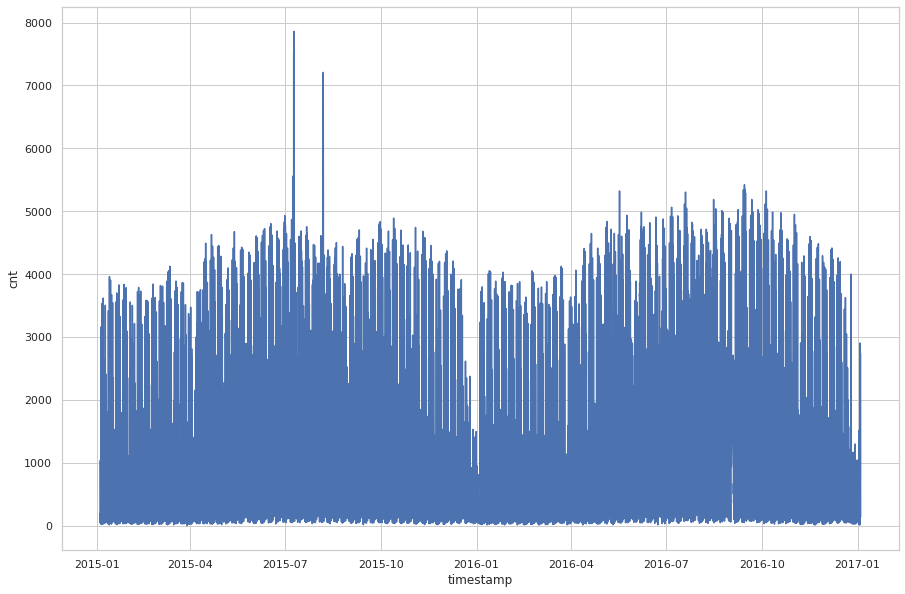

In [46]:
# Попробуем посмотреть на число поездок по датам и времени
sns.lineplot(data=london, x='timestamp', y='cnt')

In [47]:
# график получился не информативным...

In [48]:
#  Заресамлпим по дням и попоробуем еще раз
london.set_index('timestamp', inplace=True)

In [79]:
london_rs = london.resample('D').sum()
london_rs.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-01-04,9234,59.5,15.5,2262.5,180.0,69.0,0.0,24.0,72.0
2015-01-05,20372,193.0,161.0,1927.5,212.5,80.0,0.0,0.0,72.0
2015-01-06,20613,188.5,128.0,1893.5,384.0,74.0,0.0,0.0,72.0
2015-01-07,21064,171.5,103.5,1796.5,454.5,60.0,0.0,0.0,69.0
2015-01-08,15601,234.0,187.0,1903.5,491.5,84.0,0.0,0.0,72.0


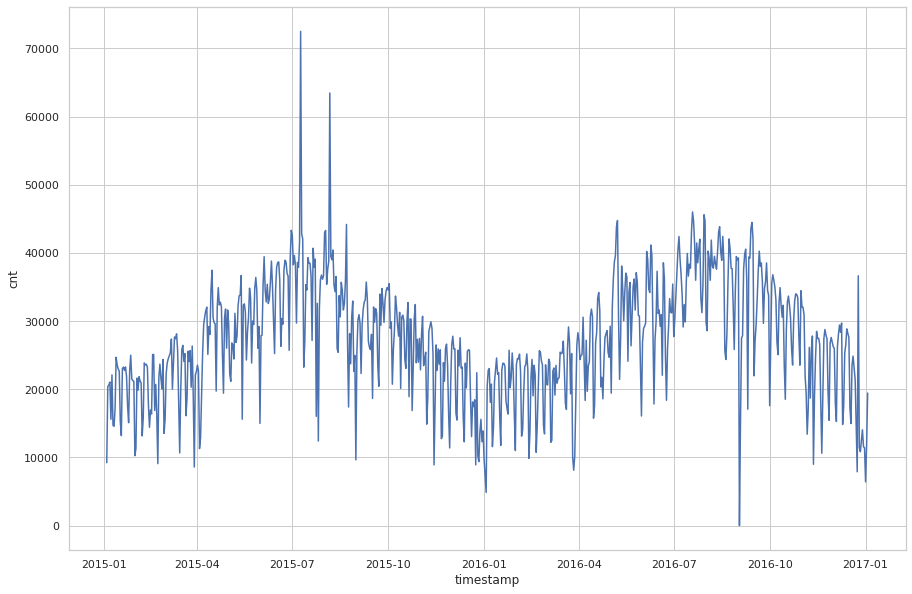

In [80]:
# Так уже лучше
sns.lineplot(data=london_rs, x='timestamp', y='cnt')

In [81]:
# Мы обнаружили скачки на графике и хотим проанализировать их. 
# Для этого мы попробуем построить доверительный интервал вокруг данных - всё, что выпадает за 
# его пределы, будет считаться аномалией,и на отдельные из них мы потом и посмотрим.
#
# Но мы не можем просто так посчитать доверительный интервал для всего: 
# так мы можем упустить важные характеристики данных! Например, сезонные колебания. 
# 
# Чтобы учесть этот момент, мы построим доверительный интервал, используя скользящее среднее.

In [82]:
# Сначала посчитаем скользящее среднее с окном 3
london_rs.insert(1, 'cnt_rolling', london_rs.cnt.rolling(3).mean()) 
london_rs.head()

,cnt,cnt_rolling,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,,
2015-01-04,9234,NaN,59.5,15.5,2262.5,180.0,69.0,0.0,24.0,72.0
2015-01-05,20372,NaN,193.0,161.0,1927.5,212.5,80.0,0.0,0.0,72.0
2015-01-06,20613,16739.666667,188.5,128.0,1893.5,384.0,74.0,0.0,0.0,72.0
2015-01-07,21064,20683.000000,171.5,103.5,1796.5,454.5,60.0,0.0,0.0,69.0
2015-01-08,15601,19092.666667,234.0,187.0,1903.5,491.5,84.0,0.0,0.0,72.0


In [89]:
london_rs = london_rs.iloc[:, :2]
london_rs.head()

,cnt,cnt_rolling
timestamp,,
2015-01-04,9234,NaN
2015-01-05,20372,NaN
2015-01-06,20613,16739.666667
2015-01-07,21064,20683.000000
2015-01-08,15601,19092.666667


In [90]:
# Посчитаем разницу между ожидаемыми и подсчитанными значениями
london_rs['dif'] = london_rs.cnt - london_rs.cnt_rolling
london_rs.head()

,cnt,cnt_rolling,dif
timestamp,,,
2015-01-04,9234,NaN,NaN
2015-01-05,20372,NaN,NaN
2015-01-06,20613,16739.666667,3873.333333
2015-01-07,21064,20683.000000,381.000000
2015-01-08,15601,19092.666667,-3491.666667


In [91]:
# Посчитаем стандартное отклонение этой разницы
std = np.std(london_rs.dif)
std

4558.58664111794

In [94]:
# Посчитаем верхние и нижние границы доверительных интервалов
london_rs['upper_bound'] = london_rs.cnt_rolling + std*2.576
london_rs['lower_bound'] = london_rs.cnt_rolling - std*2.576
london_rs.head()

,cnt,cnt_rolling,dif,upper_bound,lower_bound
timestamp,,,,,
2015-01-04,9234,NaN,NaN,NaN,NaN
2015-01-05,20372,NaN,NaN,NaN,NaN
2015-01-06,20613,16739.666667,3873.333333,28482.585854,4996.747479
2015-01-07,21064,20683.000000,381.000000,32425.919188,8940.080812
2015-01-08,15601,19092.666667,-3491.666667,30835.585854,7349.747479


In [95]:
london_rs.tail()

,cnt,cnt_rolling,dif,upper_bound,lower_bound
timestamp,,,,,
2016-12-30,11566,12682.000000,-1116.000000,24424.919188,939.080812
2016-12-31,11424,12347.333333,-923.333333,24090.252521,604.414146
2017-01-01,6421,9803.666667,-3382.666667,21546.585854,-1939.252521
2017-01-02,11823,9889.333333,1933.666667,21632.252521,-1853.585854
2017-01-03,19436,12560.000000,6876.000000,24302.919188,817.080812


In [97]:
# Посмотрим на наблюдения, для которых значения оказались больше 99% доверительного интервала
london_rs.query("cnt > upper_bound")

,cnt,cnt_rolling,dif,upper_bound,lower_bound
timestamp,,,,,
2015-07-09,72504,50705.000000,21799.000000,62447.919188,38962.080812
2015-08-06,63468,46627.333333,16840.666667,58370.252521,34884.414146
2016-09-04,27512,14259.000000,13253.000000,26001.919188,2516.080812
2016-12-25,36653,19650.666667,17002.333333,31393.585854,7907.747479


In [ ]:
# Попробуем выяснить чем обусловлен такой скачек 2015-07-09

In [107]:
london.reset_index(inplace=True)

In [115]:
anomaly = london.loc[london['timestamp'].dt.date == pd.to_datetime('2015-07-09')]
anomaly

,index,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
4453,4453,2015-07-09 00:00:00,400,16.0,16.0,55.0,14.0,1.0,0.0,0.0,1.0
4454,4454,2015-07-09 01:00:00,212,15.5,15.5,59.0,14.0,1.0,0.0,0.0,1.0
4455,4455,2015-07-09 02:00:00,111,14.0,14.0,67.0,15.0,1.0,0.0,0.0,1.0
4456,4456,2015-07-09 03:00:00,81,14.0,14.0,63.0,18.5,1.0,0.0,0.0,1.0
4457,4457,2015-07-09 04:00:00,76,14.0,14.0,63.0,18.0,1.0,0.0,0.0,1.0
4458,4458,2015-07-09 05:00:00,269,13.0,13.0,67.0,17.0,1.0,0.0,0.0,1.0
4459,4459,2015-07-09 06:00:00,1724,13.0,13.0,67.0,16.0,1.0,0.0,0.0,1.0
4460,4460,2015-07-09 07:00:00,5309,13.5,13.5,65.0,17.0,1.0,0.0,0.0,1.0
4461,4461,2015-07-09 08:00:00,7531,14.5,14.5,61.0,19.0,2.0,0.0,0.0,1.0
4462,4462,2015-07-09 09:00:00,4832,15.0,15.0,59.0,16.0,2.0,0.0,0.0,1.0


In [116]:
anomaly.duplicated()

4453    False
4454    False
4455    False
4456    False
4457    False
4458    False
4459    False
4460    False
4461    False
4462    False
4463    False
4464    False
4465    False
4466    False
4467    False
4468    False
4469    False
4470    False
4471    False
4472    False
4473    False
4474    False
4475    False
4476    False
dtype: bool

Помог гугл- это был день самой маштабной забостовки работников метро в Лондоне
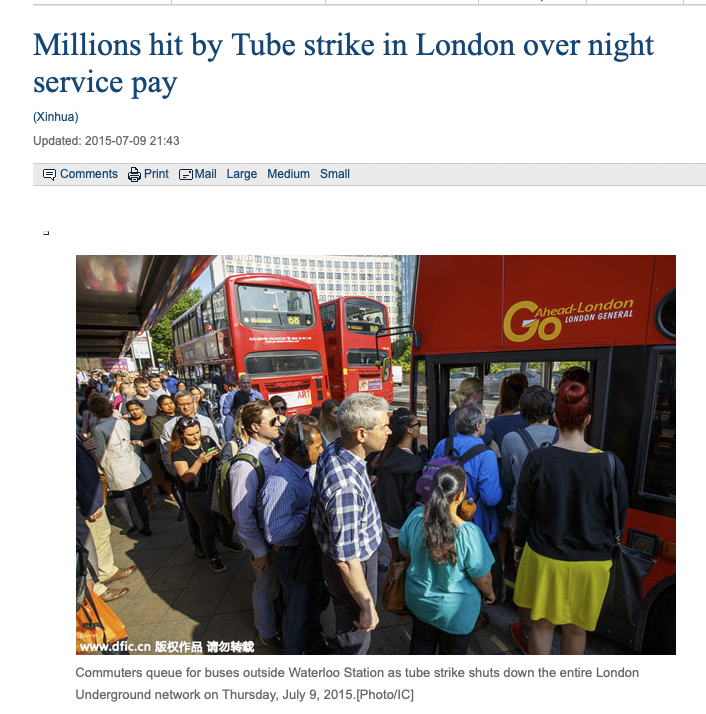

---

In [118]:
# Теперь посмотрим на наблюдения, для которых значения оказались меньше 99% доверительного интервала
london_rs.query("cnt < lower_bound")

,cnt,cnt_rolling,dif,upper_bound,lower_bound
timestamp,,,,,
2015-05-14,15609,28709.333333,-13100.333333,40452.252521,16966.414146
2015-07-12,23240,36036.666667,-12796.666667,47779.585854,24293.747479
2015-07-24,16034,31013.666667,-14979.666667,42756.585854,19270.747479
2015-08-24,17400,29529.333333,-12129.333333,41272.252521,17786.414146
2015-11-14,8898,21037.333333,-12139.333333,32780.252521,9294.414146
2016-09-02,0,26086.333333,-26086.333333,37829.252521,14343.414146
2016-09-10,17080,31262.000000,-14182.000000,43004.919188,19519.080812
2016-09-16,21967,36193.333333,-14226.333333,47936.252521,24450.414146
2016-11-12,8990,20878.000000,-11888.000000,32620.919188,9135.080812


In [119]:
# Почему не было ни одной аренды 2016-09-02 ? 

In [121]:
anomaly_2 = london.loc[london['timestamp'].dt.date == pd.to_datetime('2016-09-02')]
anomaly_2

,index,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season


In [ ]:
# Судя по всему, произошла ошибка при сборе данных